# Exploring the Data
Exploration of all elements in Quarterly Reports and their likelihood to influence future price movement which indicates trade decision in the future.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame 
from sklearn.ensemble import ExtraTreesClassifier

### Get final data generated by preprocessing

In [67]:
final_df = pd.read_excel('final_data.xlsx')
final_df = final_df.drop(final_df.columns[0], axis = 1)

### Visualizing the count of Buy, Hold, and Sell
Visual check for any class imbalance among the quarterly reports.

In [68]:
# Separating each class into respective DataFrames
sell_df = final_df[final_df['Decision']==0].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
buy_df = final_df[final_df['Decision']==1].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
hold_df = final_df[final_df['Decision']==2].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)

In [69]:
sell_df.head()

,gross revenue,revenue,total operating cost,selling expense,administration expense,financial expense,net investment income,operating profit,retained profit,net income attributable to parent company,basic EPS,"total share (10,000 shares)",total assets,current assets,total liabilities,current liabilities,minority equity,intangible assets,goodwill
0,20.547810,20.547810,21.917360,40.493611,32.815526,-25.273962,-100.000000,17.289399,22.804241,22.507598,22.480620,0.000000,-3.772301,-8.923411,-26.541283,-15.713399,-8.425051,4.084908,0.0
1,12.996168,12.996168,2.929985,-20.751992,9.729352,-29.727009,-57.911291,60.846788,59.022115,58.765778,58.837209,0.000000,2.888365,14.419261,-1.776355,-2.416558,2.894519,-0.910106,0.0
2,7.580869,7.580869,-1.592748,-35.788508,18.578732,-103.484603,57.560683,23.908331,28.435625,28.426094,19.896641,7.108014,18.681648,49.476271,4.003814,7.674436,3.959611,-0.926466,0.0
3,14.356531,14.356531,27.121710,0.349871,-20.667307,-8548.874321,63.586382,-3.328906,-7.271905,-7.249617,-7.255747,0.000000,2.101489,-4.177791,-14.450962,-9.503819,641.491151,7.881599,0.0
4,-5.870604,-5.870604,-6.495463,-16.254411,159.101641,-101.715141,-97.064021,-5.273053,-0.108514,-0.133745,-0.116189,0.000000,7.546865,19.078899,17.850227,19.197520,0.510986,-0.983750,0.0


### Plot the count of each DataFrame of each class

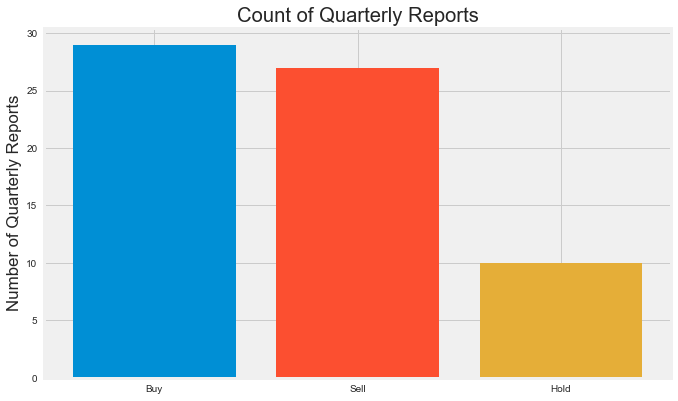

In [70]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

plt.bar("Buy", buy_df.shape[0])
plt.bar("Sell", sell_df.shape[0])
plt.bar("Hold", hold_df.shape[0])

plt.ylabel("Number of Quarterly Reports")
plt.title('Count of Quarterly Reports')
plt.savefig("class_count.png")
plt.show()

## Correlations
Checking for any correlation between the future price and the current quarter's features.

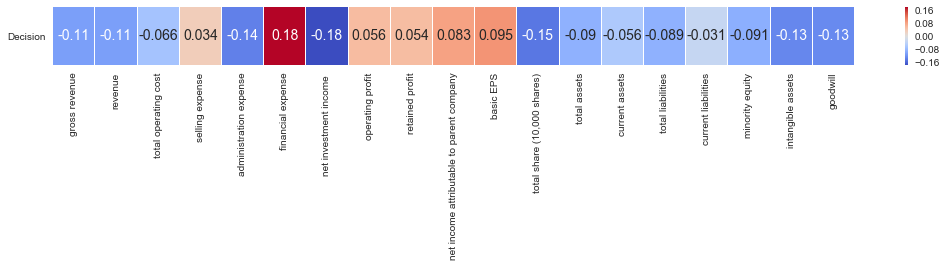

In [83]:
# Correlation DF of all classes
corr = final_df.corr().iloc[[-1],0:-1]
# Plot the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(corr, annot=True, linewidths=.1, cbar=True, cmap="coolwarm")
plt.xticks()
plt.yticks(rotation=0)
plt.savefig("correlation_feature_price.png")
plt.show()

## Feature Selection
Reduce the feature set for computational simplicity and potential improvement in accuracy.

### Feature Importances from the DF

In [84]:
# n_estimators: 弱学习器的最大迭代次数，或者说最大的弱学习器的个数。
#               一般来说n_estimators太小，容易欠拟合，n_estimators太大，计算量会太大.
#               并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以一般选择一个适中的数值。
forest = ExtraTreesClassifier(n_estimators=200)

# Setting the corresponding variables for our classifier
X = final_df.drop(['Decision'], 1)
y = final_df.Decision

# Fitting the classifier
%timeit forest.fit(X, y)

260 ms ± 41.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
# Determining the important features
importances = forest.feature_importances_
# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)
# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]
print(indices)

[ 6 16  5  4 17  8  9 10  0 12 13 18  2 14  3  1 15  7 11]


### Plot the most important features

Feature Rankings:
1. net investment income : 0.06980129051317549
2. minority equity: 0.06908877131696751
3. financial expense: 0.0676569899515931
4. administration expense: 0.06531615096019552
5. intangible assets: 0.06165471745768966
6. retained profit: 0.05774419467159958
7. net income attributable to parent company: 0.05571037374660925
8. basic EPS: 0.055334490772252304
9. gross revenue: 0.05426819668863085
10. total assets: 0.052108937598502644


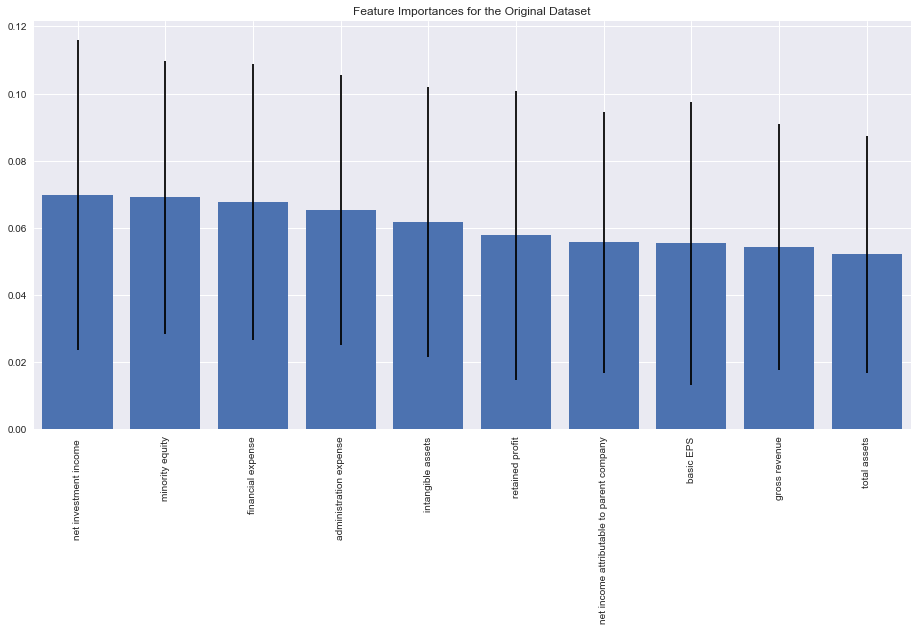

In [86]:
plt.style.use('seaborn')

print("Feature Rankings:")

# Showing the top 10 features
for i in range(10):
    # 字符串前面加f表示格式化字符串，省去str相加
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
# Plotting the top 10 features
plt.figure(figsize=(14,7))

plt.title("Feature Importances for the Original Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-.5, 9.5])
plt.show()

#### Select the Top 10 most important features
According to the feature importances from the original dataset.

In [87]:
# Assign the top 10 features as a new DF
column_names = list(X.columns[indices])[:10]
column_names.append('Decision')
top10_df = final_df[column_names]
top10_df.head(5)

,net investment income,minority equity,financial expense,administration expense,intangible assets,retained profit,net income attributable to parent company,basic EPS,gross revenue,total assets,Decision
0,-100.000000,-11.531508,217.567873,-34.057217,-0.765487,61.260408,61.488611,61.538462,-4.945285,2.636775,2
1,-100.000000,-8.425051,-25.273962,32.815526,4.084908,22.804241,22.507598,22.480620,20.547810,-3.772301,0
2,305.734905,0.589284,-42.209071,-27.876969,-0.892785,-11.492735,-11.276715,-11.211573,-10.876368,1.331521,1
3,-50.975832,-7.052970,-9.402573,39.041926,-0.903730,-12.511143,-12.386752,-12.423625,-3.551234,7.269940,1
4,-57.911291,2.894519,-29.727009,9.729352,-0.910106,59.022115,58.765778,58.837209,12.996168,2.888365,0


### Export the Top 10 important feature Dataframe
In regard to importance of feature on ExtraTreesClassifier

In [88]:
top10_df.to_excel('top10_features.xlsx')

### Feature Importances from the Correlation DF
Determining the top 10 most important features based on their correlation value with decision

In [89]:
top10_corr = corr.T.apply(abs).sort_values(by='Decision', ascending=False)[:10]
top10_corr

,Decision
net investment income,0.181811
financial expense,0.181079
"total share (10,000 shares)",0.145458
administration expense,0.136855
intangible assets,0.130840
goodwill,0.128121
revenue,0.108139
gross revenue,0.108139
basic EPS,0.095360
minority equity,0.091243


In [90]:
top10_corr_df = final_df[top10_corr.index].join(final_df.Decision)
top10_corr_df.head()

,net investment income,financial expense,"total share (10,000 shares)",administration expense,intangible assets,goodwill,revenue,gross revenue,basic EPS,minority equity,Decision
0,-100.000000,217.567873,0.0,-34.057217,-0.765487,0.0,-4.945285,-4.945285,61.538462,-11.531508,2
1,-100.000000,-25.273962,0.0,32.815526,4.084908,0.0,20.547810,20.547810,22.480620,-8.425051,0
2,305.734905,-42.209071,0.0,-27.876969,-0.892785,0.0,-10.876368,-10.876368,-11.211573,0.589284,1
3,-50.975832,-9.402573,0.0,39.041926,-0.903730,0.0,-3.551234,-3.551234,-12.423625,-7.052970,1
4,-57.911291,-29.727009,0.0,9.729352,-0.910106,0.0,12.996168,12.996168,58.837209,2.894519,0


### Export the DF of Top 10 Correlated Features

In [91]:
top10_corr_df.to_excel('top10_corr_features.xlsx')